# SI 618 Homework 5 - Natural Language Processing

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. Questions 1 through 6 are worth 10 points each; Question 7 is worth 20 points.

Version 2023.10.10.1.CT

## Background
(From https://www.kaggle.com/datasets/diegosilvadefrana/2023-data-scientists-jobs-descriptions)
### 2023 Data Scientists Jobs Descriptions
This dataset was obtained from the Google Jobs API through serpAPI and contains information about job offers for data scientists in companies based in the United States of America (USA). The data may include details such as job title, company name, location, job description, salary range, and other relevant information. The dataset is likely to be valuable for individuals seeking to understand the job market for data scientists in the USA and for companies looking to recruit data scientists. It may also be useful for researchers who are interested in exploring trends and patterns in the job market for data scientists. The data should be used with caution, as the API source may not cover all job offers in the USA and the information provided by the companies may not always be accurate or up-to-date.

The goal of this homework assignment is to investigate those job descriptions.

The data file is available via https://www.kaggle.com/datasets/diegosilvadefrana/2023-data-scientists-jobs-descriptions/download?datasetVersionNumber=1.

Note that *you* will need to make decisions about how you
proceed with the analysis.  For example, you will need to 
decide whether you include or omit stopwords, whether you stem or lemmatize words before analysis, and how you handle weird situations.

Please fill in your uniqname in the next code cell:

In [150]:
MY_UNIQNAME = "yanlunar"

Answer each of the questions below.  You are encouraged to use as many code and markdown cells as you need for each question.

We **strongly** suggest running all cells from top to bottom before you submit your notebook.

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

import spacy
from collections import Counter
import re

#### Important Note
**You are not permitted to use additional packages beyond those that are already imported in the cell above, although you are welcome to import subpackages from the packages listed in the previous cell (e.g., `from spacy.lang.en.stop_words import STOP_WORDS` is fine, whereas `import fuzzywuzzy` or `from hyphenate import hyphenate_word` are not).**

## 1. What percentage of jobs include the phrase "data scientist" or "data science" in their title?  
Note that you will need to make (good) decisions about normalizing (i.e. converting to lowercase), how to handle "close" matches, etc. 
#

In [152]:
# insert your code here
jobs = pd.read_csv('Jobs.csv', index_col=0)
jobs.head()

,title,company,announcement,description
0,"Senior Analyst, Data Science and Analytics",TransUnion,The Muse,TransUnion's Job Applicant Privacy Notice Wha...
1,Senior Data Scientist,"Grubhub Holdings, Inc.",ZipRecruiter,About The Opportunity We're all about connect...
2,Lead Data Science Analyst,Discover Financial Services,LinkedIn,"Discover. A brighter future. With us, you’ll ..."
3,Data Science Intern,AbelsonTaylor,Startup Jobs,Are you a 2023 college graduate or rising coll...
4,Data Scientist,NORC at the University of Chicago,SimplyHired,"JOB DESCRIPTION: At NORC, Data Scientists pla..."


In [153]:
titles = jobs['title'].apply(lambda x: x.lower())
titles.head()

0    senior analyst, data science and analytics
1                         senior data scientist
2                     lead data science analyst
3                           data science intern
4                                data scientist
Name: title, dtype: object

In [154]:
# titles[titles.str.match('data')].unique()

In [155]:
contains = \
    titles.str.contains('data scientist')|titles.str.contains('data science')
print("The percentage is ", \
    round(titles[contains].size/titles.size * 100, 2), "%" )

The percentage is  41.39 %


### My Explanation
The percentage is 41.39%. Since the question asks for "data scientist" or "data science, I don't add similar titles like "data analyst" into it.

### 2. Create a visualization that shows the distribution of words counts of the descriptions. Omit stopwords. Describe what the visualization shows you. (Hint: a histogram is a good choice here.)

In [156]:
nlp = spacy.load("en_core_web_sm")

In [157]:
from spacy.language import Language
nlp = spacy.load('en_core_web_sm')
@Language.component("my_segmenter")
def my_segmenter(doc):
    for token in doc[:-1]:
        if token.text in [",", "•"]:
            doc[token.i + 1].is_sent_start = True
    return doc
nlp.add_pipe("my_segmenter", before="parser")

<function __main__.my_segmenter(doc)>

In [158]:
# insert your code here
desc_lower = jobs['description'].apply(lambda x: x.lower())

def replace(desc):
    desc = desc.replace("•", " ")
    return desc

desc_lower = desc_lower.apply(lambda x: replace(x))

In [159]:
desc_not_lower = jobs['description'].apply(lambda x: nlp(x))

In [160]:
desc_lower = desc_lower.apply(lambda x: nlp(x))

In [161]:
desc_lower

0      (transunion, 's, job, applicant, privacy, noti...
1      (about, the, opportunity,  , we, 're, all, abo...
2      (discover, ., a, brighter, future, .,  , with,...
3      (are, you, a, 2023, college, graduate, or, ris...
4      (job, description, :,  , at, norc, ,, data, sc...
                             ...                        
785    (description,  , $, 3,000, hiring, bonus, to, ...
786    (are, you, looking, for, a, purpose, -, driven...
787    (the, senior, data, analyst, will, join, as, a...
788    (overview, :, the, cost, controller, /, data, ...
789    (overview, :,  , hicuity, health, ,, the, lead...
Name: description, Length: 790, dtype: object

Omit stopwords

In [162]:
def words_gen(doc):
    words = [token.text for token in doc \
        if not token.is_punct and not token.is_space and not token.is_stop]
    return words

desc_lower_no = desc_lower.apply(words_gen)
desc_not_lower_no = desc_not_lower.apply(words_gen)

#### Since I was a little bit confused about the question, I made two versions of answer here.
#### version 1: count the word frequency

In [163]:
desc_lower_no_explode = desc_lower_no.explode()
desc_lower_no_list = desc_lower_no_explode.to_list()

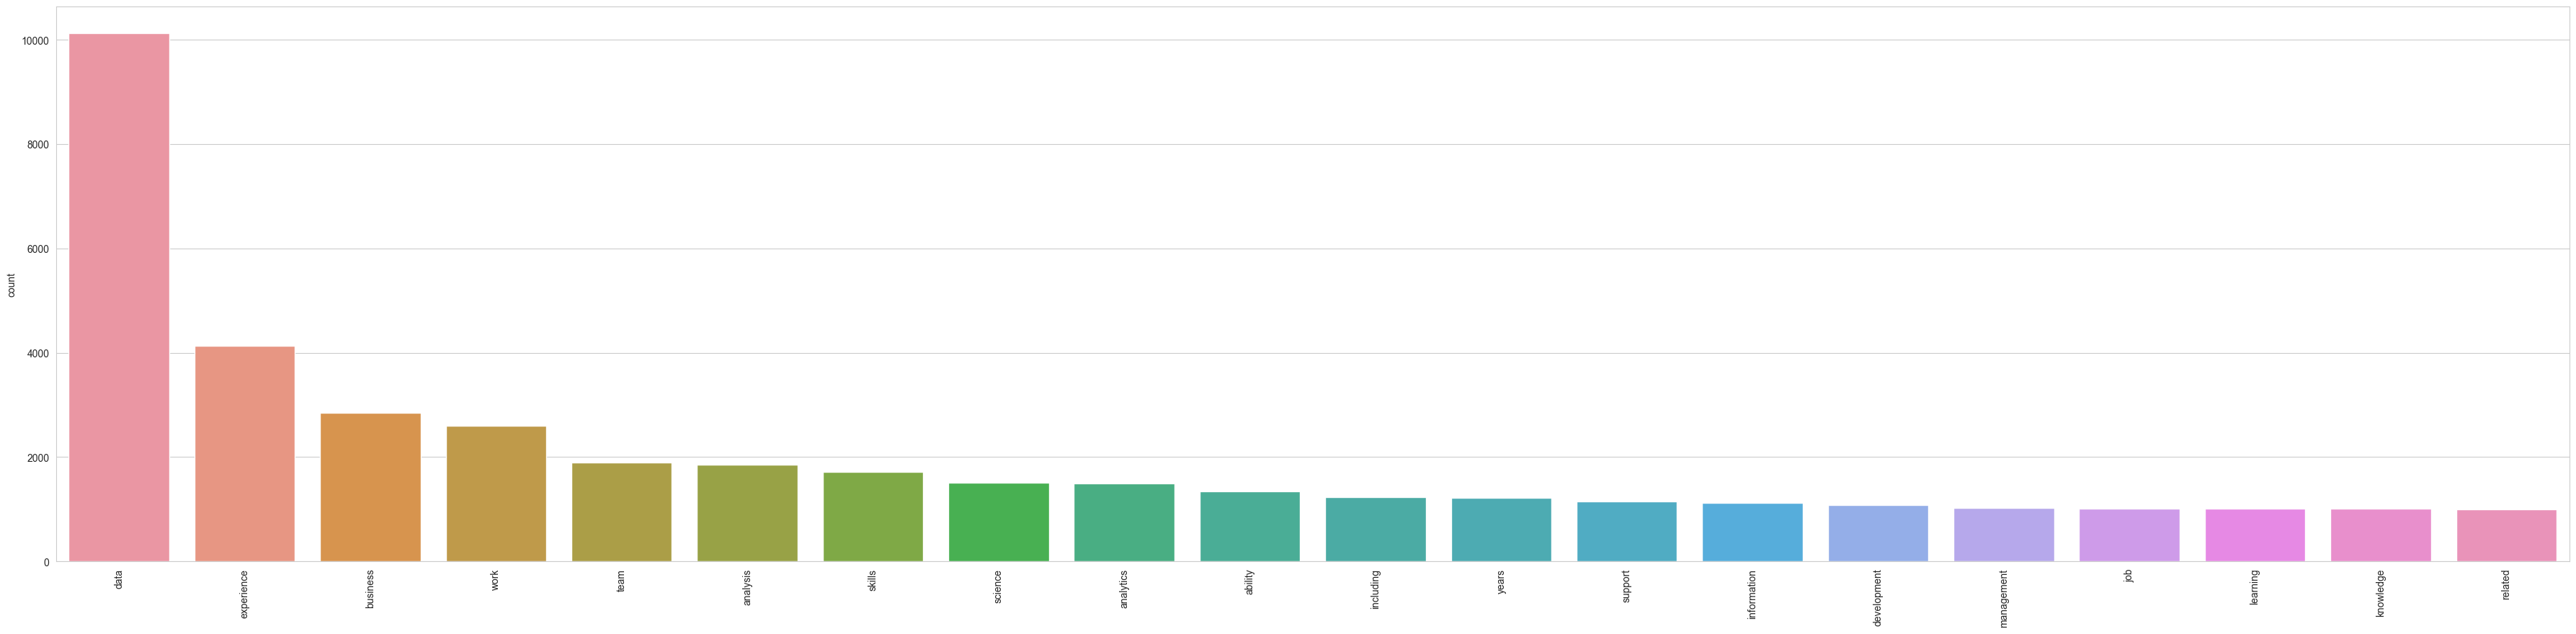

In [164]:
plt.figure(figsize=(45,10))
sns.countplot(x=desc_lower_no_list, \
    order=pd.Series(desc_lower_no_list).value_counts().head(20).index)
plt.xticks(rotation=90)
plt.show()

#### My Explanation
From the figure, 
- The word frequency of "data" was far more than other words. 
- The top words are "data", "experience", "business", "work" "team", "analysis" and "skills". It may indicating that the job descriptions mention data-related and either the job has a requirement on experience or it is rich in experience. Also, they may emphasize teamwork or analysis skills.

#### version 2: word counts of each description

In [165]:
word_counts  = []
for desc in desc_lower_no:
    word_counts.append(len(desc))

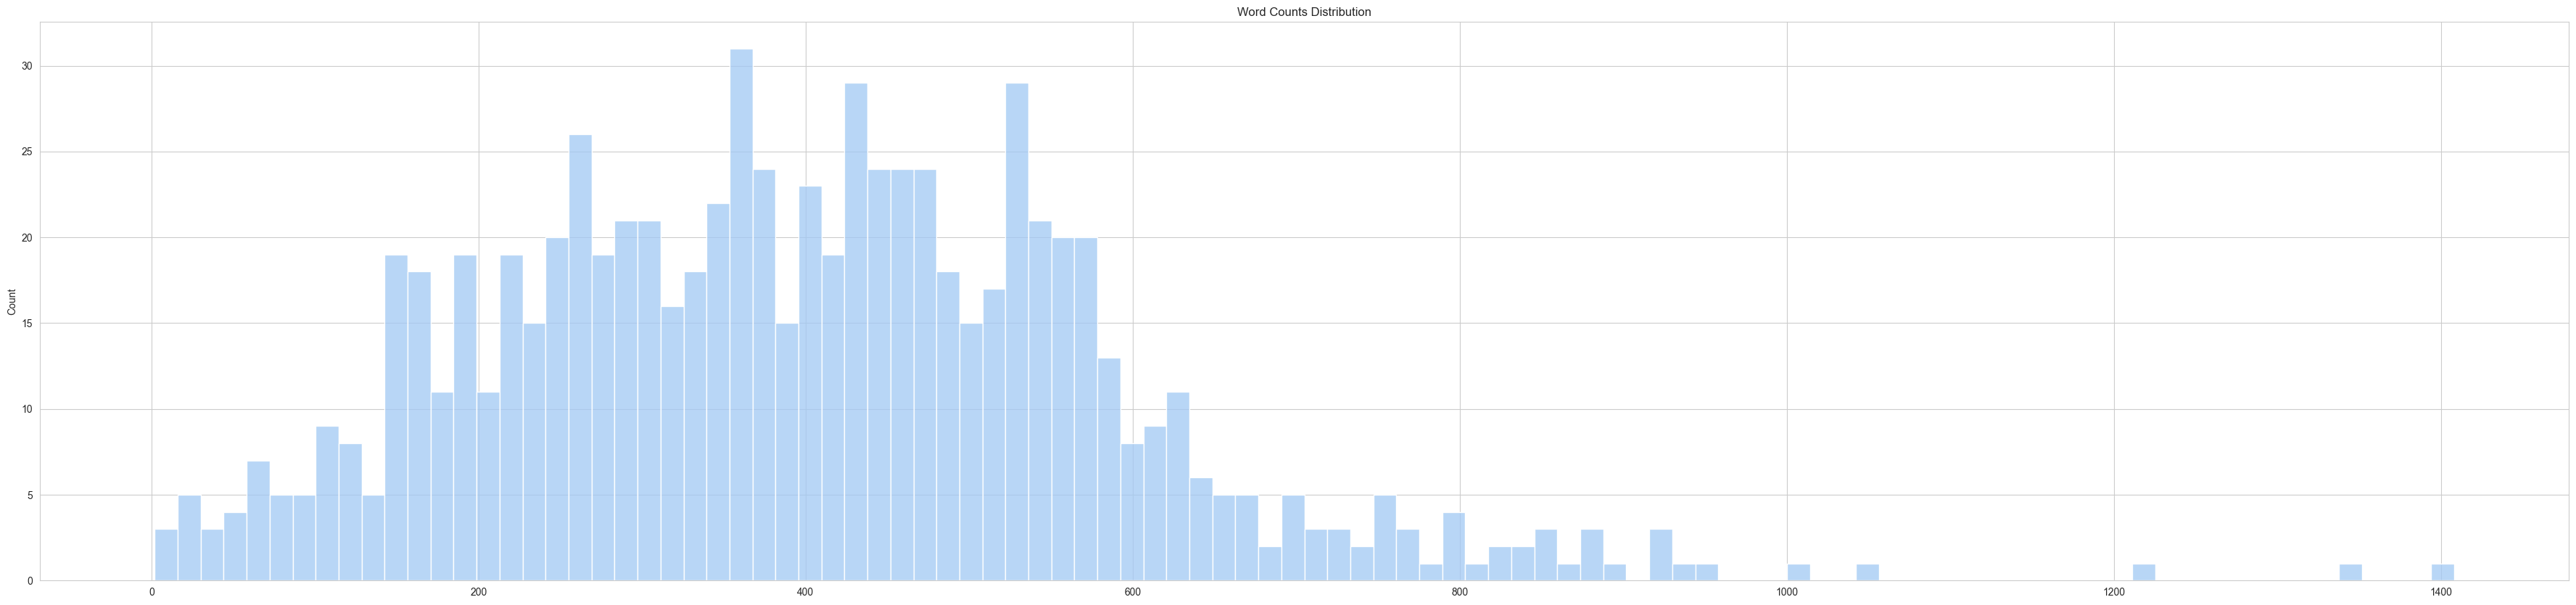

In [166]:
plt.figure(figsize=(45,10))
sns.histplot(pd.Series(word_counts), bins=100)
plt.title("Word Counts Distribution")
plt.show()

#### My Explanation
From the figure, 
- The distribution of the word counts of discriptions is right skewed
- The distribution has long tails: many descriptions are extremely long.

### 3. Based on the descriptions, create a bar chart showing the top 10 tools used by data scientists.
Here is a list of tools to consider: Python, R, SQL, Jupyter, NumPy, Pandas, Matplotlib, Seaborn, SciPy, Scikit-Learn, TensorFlow, PyTorch, Keras, XGBoost, Plotly, Dask, Spark, Hadoop, AWS, Google Cloud, Azure, IBM Watson, NLTK, OpenCV, Gensim, StatsModels, Theano, Caffe, Bokeh, Folium, ggplot, Geopandas, Yellowbrick, Flask, Dash, Streamlit, FastAPI, PySpark, TensorBoard, NetworkX, BeautifulSoup, Scrapy, Numba, Cython, Git

Provide an interpretation of your bar chart -- what does it tell you?


In [167]:
# insert your code here
tools_list = ["Python", "R", "SQL", "Jupyter", "NumPy", "Pandas", "Matplotlib", "Seaborn", "SciPy", "Scikit-Learn", "TensorFlow", "PyTorch", "Keras", "XGBoost", "Plotly", "Dask", "Spark", "Hadoop", "AWS", "Google Cloud", "Azure", "IBM Watson", "NLTK", "OpenCV", "Gensim", "StatsModels", "Theano", "Caffe", "Bokeh", "Folium", "ggplot", "Geopandas", "Yellowbrick", "Flask", "Dash", "Streamlit", "FastAPI", "PySpark", "TensorBoard", "NetworkX", "BeautifulSoup", "Scrapy", "Numba", "Cython", "Git"]

In [168]:
tools_list_lower = [item.lower() for item in tools_list]
tools_dic = {tool: 0 for tool in tools_list_lower}

for desc in desc_lower:
    for token in desc:
        if token.text in tools_list_lower: 
            tools_dic[token.text] += 1

<Axes: title={'center': 'Top 10 Tools'}, xlabel='Tools', ylabel='Count'>

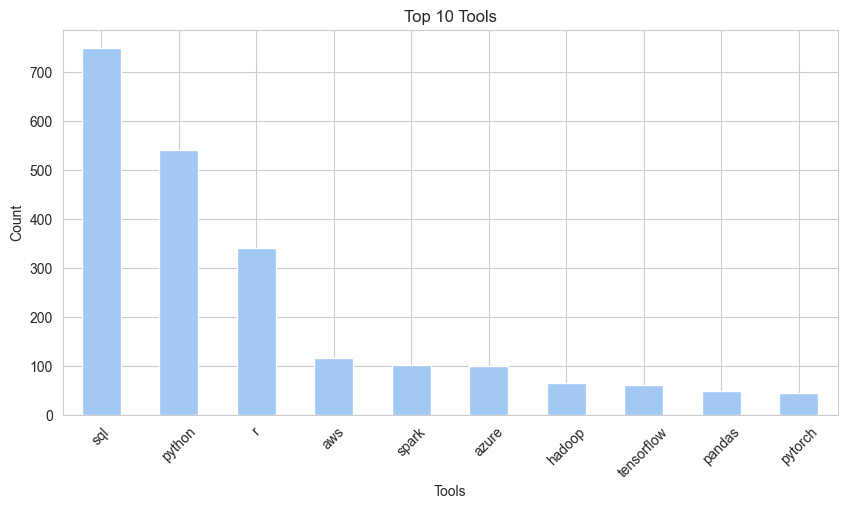

In [169]:
tools = pd.Series(tools_dic)
sns.set_style("whitegrid")
sns.set_palette("pastel")
tools.sort_values(ascending=False).head(10).plot(kind="bar", \
    figsize=(10,5), rot=45, \
        title="Top 10 Tools", xlabel="Tools", ylabel="Count")

#### My Explanation
From the figure
- The top 10 tools are sql, python, r, aws, spark, azure, hadoop, tensorflow, pandas and pytorch
- The top 3 tools are sql, python, r, which are highly distinguishable from other tools 
- The sql are the most commonly used since it's number are far more than python in the second place.

### 4. Create a bar chart showing the number of postings for each of the following values of the number of years of experience required:
1. <2
2. 2-4
3. 5-9
4. 10+

You will need to try a number of different approaches to extracting this information from the `description` field.

In [170]:
desc = jobs['description'].apply(lambda x: x.lower())

In [171]:
# insert your code here
# for desc in desc_lower:
#     for ent in desc.ents:
#         if ent.label_ == "DATE":
#             print(desc)
#             print(ent)

In [172]:
# for desc in desc_lower:
#     for i, token in enumerate(desc):
#         if token.text == 'experience':
#             print(desc[i-5],desc[i-4], desc[i-3], desc[i-2], desc[i-1], token)

In [173]:
# year_dic = {"<2": 0, "2-4": 0, "5-9": 0, "10+": 0}

# for desc in desc_lower:
#     for idx, sent in enumerate(desc.sents):
#         if 'experience' in sent.text:
#             # print(sent)
#             # numbers = [token.text for token in sent if token.is_digit]
#             years_index = -1
#             for i, token in enumerate(sent):
#                 if token.text == "years":
#                     years_index = i
#                     break
                
#             if years_index != -1:
#                 numbers=[]

#                 start_index = max(0, years_index - 3)
#                 end_index = years_index

#                 split_sent = sent[start_index:end_index]
#                 for i, token in enumerate(split_sent):
#                     if token.text == "+":
#                         print(numbers)
#                         numbers.append(split_sent[i-1].text + token.text)
#                         print(numbers)
#                     if (token.like_num | token.is_digit): 
#                         numbers.append(token.text)
#                         # print(numbers)
                
#                 print(numbers)
                
                
#                 # print(idx)
#                 # print(sent)
#                 # print(numbers)
                    

In [174]:
# year_dic = {"2": 0, "4": 0, "9": 0, "99": 0}
# word_to_number = {
#     "zero": 0,
#     "one": 1,
#     "two": 2,
#     "three": 3,
#     "four": 4,
#     "five": 5,
#     "six": 6,
#     "seven": 7,
#     "eight": 8,
#     "nine": 9,
#     "ten": 10
# }
# for desc in desc_lower:    
#     years_index = -1
#     for i, token in enumerate(desc):
#         if token.text == "years":
#             years_index = i
#             break
        
#     if years_index != -1:
        
#         start_index = max(0, years_index - 5)
#         end_index = years_index
#         numbers=[]
#         split_sent = desc[start_index:(end_index+1)]
#         for i, token in enumerate(split_sent):
#             if token.text == "+" and (split_sent[i-1].is_digit | split_sent[i-1].like_num):
#                 # print(numbers)
#                 numbers.append(split_sent[i-1].text + token.text)
#                 # print(numbers)
#             elif (token.like_num | token.is_digit) and (split_sent[i+1].text != "+"): 
#                 numbers.append(token.text)
#                 # print(numbers)
                
#         # print(idx)
#         print(split_sent)
#         print(numbers)
        
#         if (len(numbers) == 2) and (numbers[0][-1] != "+") and (numbers[1][-1] != "+") and numbers[0] not in word_to_number.keys() and numbers[1] not in word_to_number.keys():
#             print("0000000", numbers[0], numbers[1])
#             start = float(numbers[0])
#             end = float(numbers[1])
#             for year_dic_key in year_dic.keys():
#                 if int(year_dic_key) >= start and int(year_dic_key) <= end:
#                     year_dic[year_dic_key] += 1          
                
#         else: 
#             for number in numbers:
#                 if number[-1] == "+":
#                     number = number[:-1]
#                 if number in word_to_number.keys():
#                     number = word_to_number[number]
#                 else:
#                     number = 99
#                 if number < 20:
#                     for year_dic_key in year_dic.keys():
#                         if float(number) >= int(year_dic_key):
#                             year_dic[year_dic_key] += 1 
# print(year_dic)

In [175]:
# result = {
#     "0-2": year_dic["2"],
#     "2-4": year_dic['4'],
#     "5-9": year_dic['9'],
#     "10+": year_dic['99']
# }

# pd.Series(result).plot(kind="bar", figsize=(10,5), rot=45,\
#     title="Years of Experience", xlabel="Years", ylabel="Count")

In [176]:
# pattern = r'(\d+(?:[-+]\d+)?)\s+(?:\w+\s+){0,4}experience'
pattern = r'(\d+|(?:one|two|three|four|five|six|seven|eight|nine|ten)(?:(?:\s+to\s+|\s*[-+]\s*)\d+)?)\s+(?:\w+\s+){0,4}experience'


word_to_number = {
    "one": 1,
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
    "six": 6,
    "seven": 7,
    "eight": 8,
    "nine": 9,
    "ten": 10
}

count_less_than_2 = 0
count_2_to_4 = 0
count_5_to_9 = 0
count_10_plus = 0

for desc in jobs['description'].apply(lambda x: x.lower()):
    matches = re.findall(pattern, desc)
    # print(matches)
    # print(desc)
    for match in matches:
        if re.search(r'[-+]', match):
            lower, upper = map(int, re.split(r'[-+]', match))
            if lower >= 2 and upper <= 4:
                count_2_to_4 += 1
            elif lower >= 5 and upper <= 9:
                count_5_to_9 += 1
            elif "10" in match:
                count_10_plus += 1
        else:
            if match.isdigit():
                num = int(match)
                if num < 2:
                    count_less_than_2 += 1
                elif num >= 2 and num <= 4:
                    count_2_to_4 += 1
                elif num >= 5 and num <= 9:
                    count_5_to_9 += 1
                elif num >= 10:
                    count_10_plus += 1
            else:
                doc = nlp(match)
                num = 0
                for token in doc:
                    if token.like_num:
                        num = word_to_number[token.text]
                        break
                # print(num)
                if num < 2:
                    count_less_than_2 += 1
                elif num >= 2 and num <= 4:
                    count_2_to_4 += 1
                elif num >= 5 and num <= 9:
                    count_5_to_9 += 1
                elif num >= 10:
                    count_10_plus += 1

result = {
    "0-2": count_less_than_2,
    "2-4": count_2_to_4,
    "5-9": count_5_to_9,
    "10+":count_10_plus
}

<Axes: title={'center': 'Years of Experience'}, xlabel='Years', ylabel='Count'>

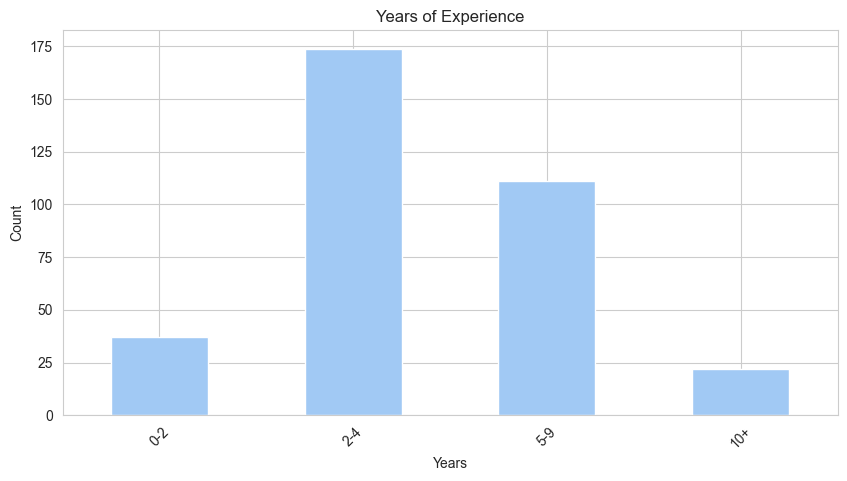

In [177]:
pd.Series(result).plot(kind="bar", figsize=(10,5), rot=45,\
    title="Years of Experience", xlabel="Years", ylabel="Count")

#### My Explanation
- The requirement of year 2-4 takes up the most percentage
- The requirement of year 5-9 takes up the seconde percentage 
- The requirement of 10+ years take up the lowest percentage

### 5. What are the 5 most commonly used verbs in the job descriptions?
Is there a common theme? Are these the verbs that you would expect?

In [178]:
# insert your code here
def words_gen(doc):
    words = [token.text for token in doc \
        if token.pos_ == "VERB"]
    return words

desc_not_lower_no = desc_not_lower.apply(words_gen)

In [179]:
desc_not_lower_verb_explode = desc_not_lower_no.explode()
desc_not_lower_verb_list = desc_not_lower_verb_explode.to_list()

In [180]:
desc_not_lower_verb_list = [item for item in desc_not_lower_verb_list if item != "•"]

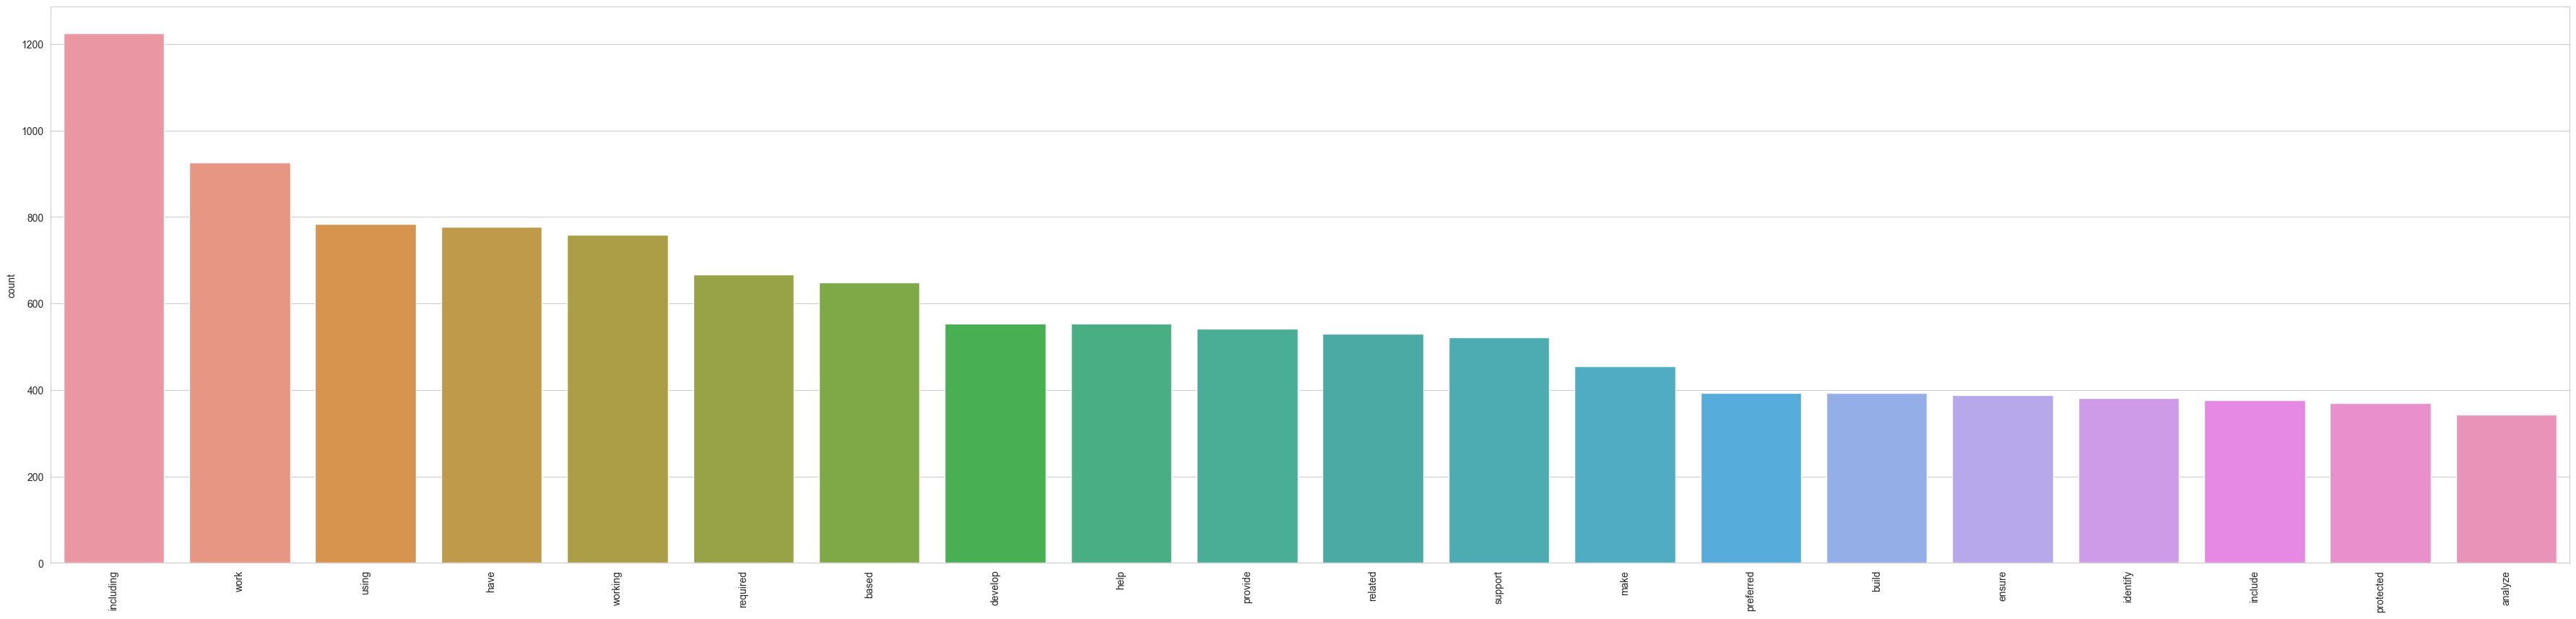

In [181]:
plt.figure(figsize=(45,10))
sns.countplot(x=desc_not_lower_verb_list, \
    order=pd.Series(desc_not_lower_verb_list).value_counts().head(20).index)
plt.xticks(rotation=90)
plt.show()

#### My Explanation
The 5 most commonly used are "including", "work", "using", "have" and "working". It is reasonable since these words are putting requirements on applicants.

### 6. Based on the descriptions, what are the 3 most commonly mentioned organizations (hint: use Named Entity Recognition and look for ORG labels).
Do these results surprise you?  Why or why not?


In [182]:
# insert your code here
def words_gen(doc):
    words = [ent.text for ent in doc.ents \
        if ent.label_ == "ORG"]
    return words

desc_not_lower_org = desc_not_lower.apply(words_gen)

In [183]:
desc_not_lower_org_explode = desc_not_lower_org.explode()
desc_not_lower_org_list = desc_not_lower_org_explode.to_list()

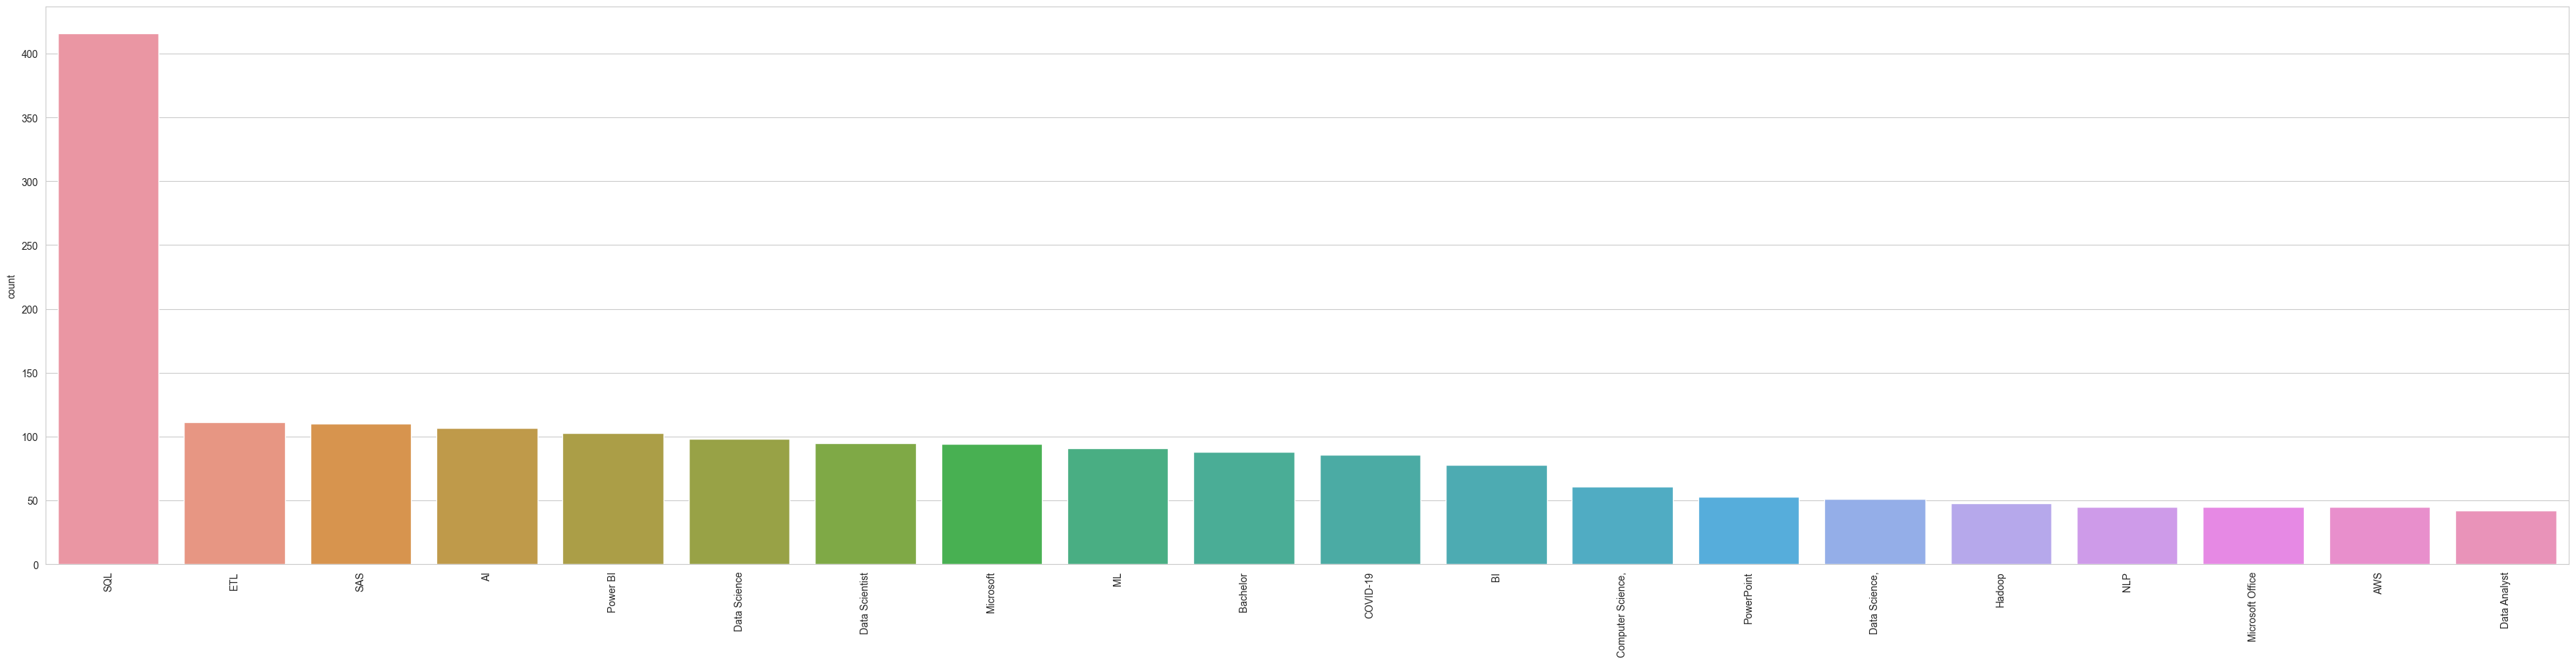

In [184]:
plt.figure(figsize=(45,10))
sns.countplot(x=desc_not_lower_org_list, \
    order=pd.Series(desc_not_lower_org_list).value_counts().head(20).index)
plt.xticks(rotation=90)
plt.show()

#### My Explanation
The 3 most commonly mentioned organizations are "microsoft", "sql" and "sas". However, "sql" and "sas" are more like tools instead of organizations. The SpaCy is not 100% precise in recognizing organizations.

### Q7: Create a boxplot showing the distribution of the Flesch Reading Ease Score using all job descriptions

From https://readable.com/readability/flesch-reading-ease-flesch-kincaid-grade-level/

>The Flesch Reading Ease gives a text a score between 1 and 100, with 100 being the highest readability score. Scoring between 70 to 80 is equivalent to school grade level 8. This means text should be fairly easy for the average adult to read.
>The formula was developed in the 1940s by Rudolf Flesch. He was a consultant with the Associated Press, developing methods for improving the readability of newspapers.
>Now, over 70 years later, the Flesch Reading Ease is used by marketers, research communicators and policy writers, amongst many others. All use it to help them assess the ease by which a piece of text will be understood and engaged with.



Flesch Reading Ease score = 206.835 - (1.015 × ASL) - (84.6 × ASW)
Here,

ASL = average sentence length (number of words divided by number of sentences)

ASW = average word length in syllables (number of syllables divided by number of words).

Please note that you will need to figure out how to handle non-sentences like bulleted lists.

Remember you are not permitted to import additional packages, so we recommend using the following starter code to count syllables.
```
def syllables(word):
    count = 0
    vowels = 'aeiouy'
    word = word.lower().strip(".:;?!")
    if word[0] in vowels:
        count +=1
    for index in range(1,len(word)):
        if word[index] in vowels and word[index-1] not in vowels:
            count +=1
    if word.endswith('e'):
        count -= 1
    if word.endswith('le'):
        count+=1
    if count == 0:
        count +=1
    return count
```
Be sure to include an interpretation of what the boxplot tells you.

In [185]:
# insert your code here
def syllables(word):
    count = 0
    vowels = 'aeiouy'
    word = word.lower().strip(".:;?!")
    if word and word[0] in vowels:
        count +=1
    for index in range(1,len(word)):
        if word[index] in vowels and word[index-1] not in vowels:
            count +=1
    if word.endswith('e'):
        count -= 1
    if word.endswith('le'):
        count+=1
    if count == 0:
        count +=1
    return count

In [186]:
# from spacy.language import Language
# nlp = spacy.load('en_core_web_sm')
# @Language.component("my_segmenter")
# def my_segmenter(doc):
#     for token in doc[:-1]:
#         if token.text in [",", "•"]:
#             doc[token.i + 1].is_sent_start = True
#     return doc
# nlp.add_pipe("my_segmenter", before="parser")

In [187]:
# nlp = spacy.load('en_core_web_sm')
# punct_chars = ["•"]
# nlp.add_pipe("sentencizer", \
#     before="parser", config={"punct_chars": punct_chars})

In [188]:
desc_lower_2 = jobs['description'].apply(lambda x: x.lower())
desc_lower_2 = desc_lower_2.apply(lambda x: nlp(x))

In [189]:
FRE_score = []
for desc in desc_lower_2:
    word_cnt = len(desc)
    syllables_cnt = 0 
    for token in desc:
        # print(len(token.text))
        syllables_cnt += syllables(token.text)
    ASW = syllables_cnt / word_cnt
    sentence_cnt = len(list(desc.sents))
    ASL = word_cnt / sentence_cnt
    FRE = 206.835 - (1.015 * ASL) - (84.6 * ASW)
    FRE_score.append(FRE)
    # if FRE < 0:
    #     print(desc)
    # # print(ASL, ASW, FRE)

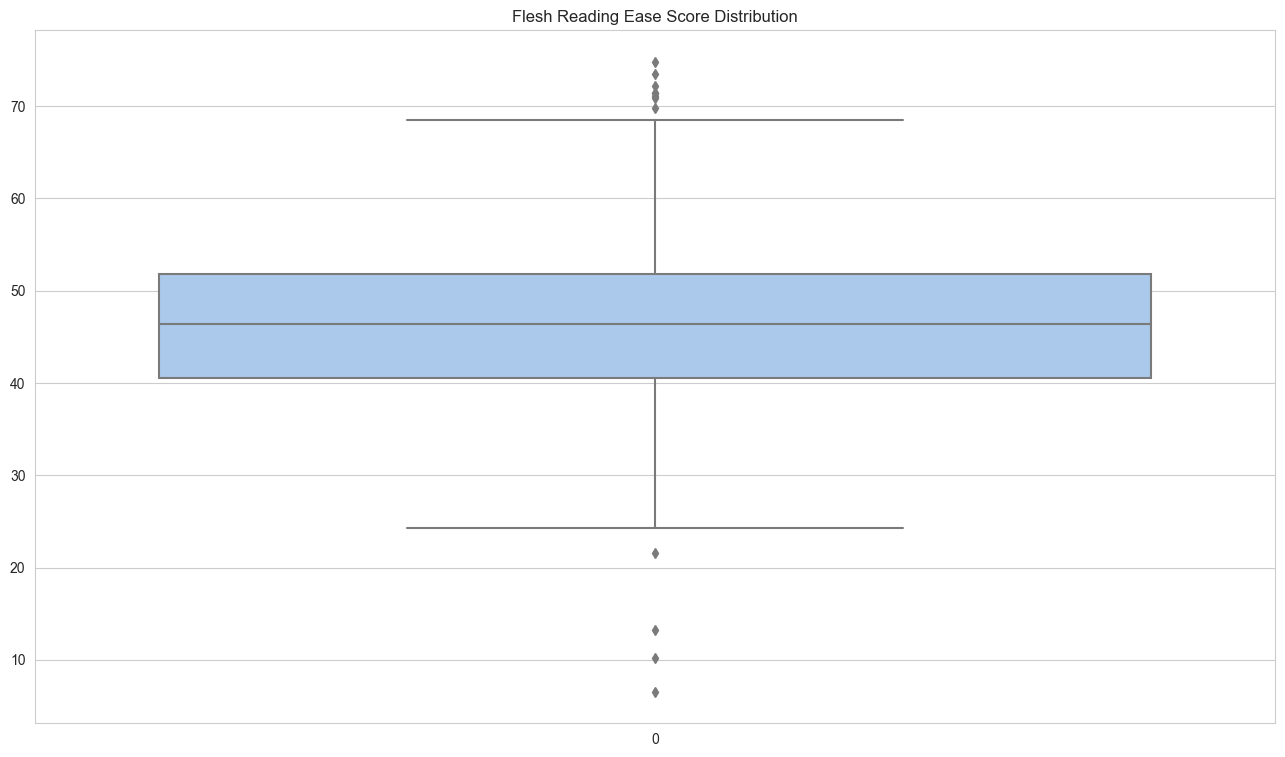

In [190]:
plt.figure(figsize=(16,9))
sns.boxplot(pd.Series(FRE_score))
plt.title("Flesh Reading Ease Score Distribution")
plt.show()

#### My Explanation
By adding a custom segmentor in the pipline, I splited sentences with "•" 
- The distribution of the Flesh Reading Ease Score is close to normal distribution.
- The average of the score are between 40-50, not so well to read.
- Few scores of some descriptions are extremely low (extremely hard to read).

# Please submit your notebook in .IPYNB and .HTML formats

We **strongly** suggest running all cells from top to bottom before you submit your notebook.